In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0.jpg to 0.jpg


In [ ]:
img_path=input()

/content/drive/MyDrive/test/sitting akarna dhanurasana/0.jpg


In [ ]:
results={0:"sitting akarna dhanurasana",1:"sitting baddha konasana",2:"sitting balasana",3:"sitting dandasana",4:"sitting gomukhasana",5:"sitting hanumanasana",6:"sitting matsyendrasana",7:"sitting navasana",8:"sitting samakonasana",9:"sitting simhasana",10:"standing adho mukha shvanasana",11:"standing ardha chandrasana",12:"standing natarajasana",13:"standing parshvakonasana",14:"standing tadasana",15:"standing trikonasana",16:"standing uttanasana",17:"standing virabhadrasana I",18:"standing virabhadrasana II",19:"standing vrikshasana"}

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import load_model
import h5py

classifier = load_model('/content/drive/MyDrive/ProjectModel.h5') #load the model that was created using cnn_multiclass.py
classifier.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
img = image.load_img(img_path, target_size = (224, 224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10,verbose=1)

1/1 [==============================] - 0s 139ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
del image
from keras.preprocessing import image

In [ ]:
print("Belong to class :",classes)
print("Pose of the given image :",results[classes[0]])

Belong to class : [0]
Pose of the given image : sitting akarna dhanurasana


In [ ]:
file='/content/drive/MyDrive/steps/'+results[classes[0]]+'.txt'
with open(file) as f:
    contents = f.read()
print("Steps to perform",results[classes[0]]+":")
print(contents)

Steps to perform sitting akarna dhanurasana:
Sit on the floor. Stretch your legs out in front of you. Ensure that your feet are close together.
Bend forward and stretch your arms to hold your toes.
Keep your torso as erect as you can.
Inhale. Lift your left leg. 
Bring your left foot up to your left ear.
Keep your hold on the other leg.
Maintain the posture. Breathe evenly.
Repeat the movement on the other side.


In [ ]:
pip install gTTS

In [ ]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class
tts = gTTS(contents) #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True) 

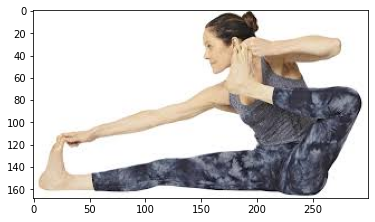

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
def compare_images(imageA, imageB):
    # compute the mean squared error and structural similarity
  	# index for the images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    m = err
    s = ssim(imageA, imageB)
    return m,s

In [ ]:
import os
m1=[]
s1=[]
path=[]
original = cv2.imread(img_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
a,b=(original.shape)
#print(a,b)
file1="/content/drive/MyDrive/train/"+results[classes[0]]+"/"
for filename in os.listdir(file1):
    image1 = cv2.imread(file1+filename)
    path.append(file1+filename)
    image1=cv2.resize(image1,(b,a))
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    m,s=compare_images(original, image1)
    m1.append(m)
    s1.append(s)

print("m1=",m1)
print("s1=",s1)
print(m1.index(min(m1)))
print(s1.index(max(s1)))
print(path[m1.index(min(m1))])
print(path[s1.index(max(s1))])

m1= [6264.9554761904765, 18840.925654761904, 12424.453194444444, 9587.453531746032, 7381.280456349206, 7388.0878571428575, 39559.59369047619, 7450.081051587302, 13672.257936507936, 9554.358055555556, 10492.67003968254, 4566.988055555556, 24983.9426984127, 10637.499484126984, 8502.288115079366, 10834.21121031746, 13897.117956349206, 9294.79484126984, 8873.839345238095, 14881.472321428571, 12079.455873015873, 9882.851805555556, 35596.7231547619, 15136.897857142858, 14590.338789682539, 37684.41496031746, 11815.528908730159, 13620.969563492063, 12878.919404761904, 13433.025813492064, 10721.703571428572, 11552.549523809525, 16366.360535714286, 24639.737896825398, 12495.09869047619, 12518.418432539682, 8232.311448412698, 13139.632797619048, 7961.993690476191, 18394.61242063492, 9714.897976190476, 15340.448174603174, 17508.68007936508, 11512.780317460318, 8686.290396825398, 8147.403273809524, 8969.454047619047, 10338.261765873016, 23974.724384920635, 39150.34882936508, 13292.184206349206, 631

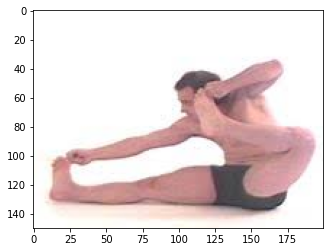

In [ ]:
image = cv2.imread(path[m1.index(min(m1))])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

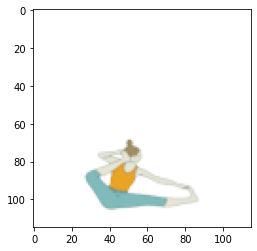

In [ ]:
image = cv2.imread(path[s1.index(max(s1))])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)